In [1]:
# Import required libraries
import pandas as pd
import geopandas as gpd
import fiona
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Set data path to the data folder within PhD folder
data_path = "../../data/working_files/comm_distpop/"

In [3]:
# List our community tables:

# First set our empty list
comm_tables = []

# For each file within our processed folder, listed by the listfunction 
for file in os.listdir(data_path):
    # if the filename is equal to wildcard.shp, i.e. has a .shp extension
    if file.endswith('.shp'):
        # we use the .append() function to append the file to our crime_rate_datasets list
        comm_tables.append(file)

print(comm_tables)

['community_0.shp', 'community_1.shp', 'community_10.shp', 'community_11.shp', 'community_12.shp', 'community_13.shp', 'community_14.shp', 'community_15.shp', 'community_16.shp', 'community_17.shp', 'community_18.shp', 'community_19.shp', 'community_2.shp', 'community_20.shp', 'community_21.shp', 'community_22.shp', 'community_23.shp', 'community_24.shp', 'community_25.shp', 'community_26.shp', 'community_27.shp', 'community_28.shp', 'community_29.shp', 'community_3.shp', 'community_30.shp', 'community_31.shp', 'community_32.shp', 'community_33.shp', 'community_34.shp', 'community_35.shp', 'community_36.shp', 'community_37.shp', 'community_38.shp', 'community_39.shp', 'community_4.shp', 'community_40.shp', 'community_41.shp', 'community_42.shp', 'community_5.shp', 'community_6.shp', 'community_7.shp', 'community_8.shp', 'community_9.shp']


In [8]:
for i in comm_tables[39:]:
    comm_shp = gpd.read_file(data_path + i)
    print(i)
    print("1: " + str(len(comm_shp['TARGET_FID'])))
    
    # Remove any rows with 0 in the Comm_Pro
    drop_rows = []

    for row in range(len(comm_shp['TARGET_FID'])):
            if comm_shp.loc[row, 'Comm_Pro'] == 0:
                #comm_shp.drop(row)
                
                drop_rows.append(row)
        
    comm_table = comm_shp.drop(drop_rows)
    #comm_table = comm_shp.Comm_Pro.str.co != '0']
    
    print("2: " + str(len(comm_table['TARGET_FID'])))
    
    # Sort by Near Distance column
    comm_table_sort = comm_table.sort_values(by=['NEAR_DIST'], ascending=True)
    
    print("3: " + str(len(comm_table_sort['TARGET_FID'])))
    
    # Add in column for cumulative community size
    comm_table_sort.insert(8, 'Cum_Pop', 0)
    
    # Calculate cumulative proportion for each
    comm_table_sort['Cum_Pop'] = comm_table_sort["Comm_Pro"].cumsum()
    
     # Add in column for calculation of cum pop over total pop     
    comm_table_sort.insert(9, 'Comm_Per', 0)
    
    # Calculate total pop
    total_comm_pop = comm_table_sort['Comm_Pro'].sum()
    
    # Create a new DF, fn, to add in comm_per, due to resetting index
    comm_table_fn = comm_table_sort.reset_index()
    
    print("4: " + str(len(comm_table_fn['TARGET_FID'])))

    # Calculate Comm Per - cum pop / total pop
    for row in range(len(comm_table_fn['Comm_Per'])):
        comm_table_fn.loc[row, 'Comm_Per'] = (comm_table_fn.loc[row, 'Cum_Pop']/total_comm_pop) * 100
        
    # Change Units of Distance by adding in new column and calculation
    comm_table_fn.insert(9, 'NEAR_DIST_KM', 0)

    for row in range(len(comm_table_fn['NEAR_DIST'])):
        comm_table_fn.loc[row, 'NEAR_DIST_KM'] = (comm_table_fn.loc[row, 'NEAR_DIST']) * 100
    
    print("5: " + str(len(comm_table_fn['TARGET_FID'])))
    
    # Export edited DF to a new shapefile
    comm_table_fn.to_file(data_path + "processed/" + i)
    
    print(i + " exported")

community_6.shp
1: 115182
2: 101457
3: 101457
4: 101457
5: 101457
community_6.shp exported
community_7.shp
1: 113354
2: 99732
3: 99732
4: 99732
5: 99732
community_7.shp exported
community_8.shp
1: 105407
2: 92008
3: 92008
4: 92008
5: 92008
community_8.shp exported
community_9.shp
1: 112407
2: 98853
3: 98853
4: 98853
5: 98853
community_9.shp exported


In [18]:
# List our community tables:

for i in comm_tables:
    comm_shp = gpd.read_file(data_path + i)
    print(i)
    print("1: " + str(len(comm_shp['TARGET_FID'])))
    
    # Remove any rows with 0 in the Comm_Pro
    drop_rows = []

    for row in range(len(comm_shp['TARGET_FID'])):
            if comm_shp.loc[row, 'Comm_Pro'] == 0:
                #comm_shp.drop(row)
                drop_rows.append(row)
        
    comm_table = comm_shp.drop(drop_rows)
    
    #print('Rows Dropped')

    # Sort by Population (ascending) column
    comm_table_fn = comm_table.sort_values(by=['Comm_Pro'], ascending=False)
    
    #print('Data Sorted')
    
    # Add in column for cumulative community size by distance
    comm_table_fn.insert(7, 'Cum_Pop', 0)
    
    #print('First column added')
    
    # Calculate cumulative community pop by distance
    comm_table_fn['Cum_Pop'] = comm_table_fn["Comm_Pro"].cumsum()
    
    #print('Column summed')
    
    # Add in column for cumulative community size by distance / total population
    comm_table_fn.insert(8, 'Comm_Per', 0)
    
    #print('Second column added')
    
    # Calculate total pop
    total_comm_pop = comm_table_fn['Comm_Pro'].sum()
    
    #print('Total calculated')
    
    #comm_table_fn.info()
    
    # Create a new DF due to resetting index (required as we've removed rows?)
    comm_table_fn = comm_table_fn.reset_index()
    
    # Calculate cumulative population by distance
    for row in range(len(comm_table_fn['TARGET_FID'])):
        comm_table_fn.loc[row, 'Comm_Per'] = ((comm_table_fn.loc[row, 'Cum_Pop'])/total_comm_pop) * 100
        
    print("6: " + str(len(comm_table_fn['TARGET_FID'])))
    
    #Export edited DF to a new shapefile
    comm_table_fn.to_file(data_path + "final/" + i)
    
    print(i + " exported")

community_0.shp
1: 114753
6: 101052
community_0.shp exported
community_1.shp
1: 112128
6: 98529
community_1.shp exported
community_10.shp
1: 97008
6: 85928
community_10.shp exported
community_11.shp
1: 28907
6: 26021
community_11.shp exported
community_12.shp
1: 68561
6: 59260
community_12.shp exported
community_13.shp
1: 49535
6: 43994
community_13.shp exported
community_14.shp
1: 87936
6: 78350
community_14.shp exported
community_15.shp
1: 11761
6: 10179
community_15.shp exported
community_16.shp
1: 3142
6: 2860
community_16.shp exported
community_17.shp
1: 83236
6: 75487
community_17.shp exported
community_18.shp
1: 35639
6: 32482
community_18.shp exported
community_19.shp
1: 48605
6: 45171
community_19.shp exported
community_2.shp
1: 100166
6: 89044
community_2.shp exported
community_20.shp
1: 25388
6: 22477
community_20.shp exported
community_21.shp
1: 18087
6: 15018
community_21.shp exported
community_22.shp
1: 87
6: 66
community_22.shp exported
community_23.shp
1: 18379
6: 17318

## Creating our Cum-Distribution Figure for each csv

In [15]:
#list newly created CSVs

# First set our empty list
comm_d_tables = []

# For each file within our processed folder, listed by the listfunction 
for file in os.listdir(data_path + "processed/"):
    # if the filename is equal to wildcard.shp, i.e. has a .shp extension
    if file.endswith('.shp'):
        # we use the .append() function
        comm_d_tables.append(file)

print(comm_d_tables)
len(comm_d_tables)

['community_0.shp', 'community_1.shp', 'community_10.shp', 'community_11.shp', 'community_12.shp', 'community_13.shp', 'community_14.shp', 'community_15.shp', 'community_16.shp', 'community_17.shp', 'community_18.shp', 'community_19.shp', 'community_2.shp', 'community_20.shp', 'community_21.shp', 'community_22.shp', 'community_23.shp', 'community_24.shp', 'community_25.shp', 'community_26.shp', 'community_27.shp', 'community_28.shp', 'community_29.shp', 'community_3.shp', 'community_30.shp', 'community_31.shp', 'community_32.shp', 'community_33.shp', 'community_34.shp', 'community_35.shp', 'community_36.shp', 'community_37.shp', 'community_38.shp', 'community_39.shp', 'community_4.shp', 'community_40.shp', 'community_41.shp', 'community_42.shp', 'community_5.shp', 'community_6.shp', 'community_7.shp', 'community_8.shp', 'community_9.shp']


43

In [16]:
for idx in range(len(comm_d_tables)):
    table = comm_d_tables[idx]
    comm_table = data_path + "processed/" + table
    comm_table_data = gpd.read_file(comm_table)
    comm_table_data['DIST_RS'] = pd.to_timedelta(comm_table_data['NEAR_DIST_'], unit='s', box=True, errors='raise')
    comm_table_data_2 = comm_table_data.set_index('DIST_RS')
    comm_table_write = comm_table_data_2.resample('.1S').mean().fillna(method='bfill')
    comm_table_write.to_csv(data_path + "processed/resample/" + table[:-4] + '_bf.csv')
    print(table + " exported")
    
    #comm_table_fn.to_csv(data_path + "processed/" + i)

community_0.shp exported
community_1.shp exported
community_10.shp exported
community_11.shp exported
community_12.shp exported
community_13.shp exported
community_14.shp exported
community_15.shp exported
community_16.shp exported
community_17.shp exported
community_18.shp exported
community_19.shp exported
community_2.shp exported
community_20.shp exported
community_21.shp exported
community_22.shp exported
community_23.shp exported
community_24.shp exported
community_25.shp exported
community_26.shp exported
community_27.shp exported
community_28.shp exported
community_29.shp exported
community_3.shp exported
community_30.shp exported
community_31.shp exported
community_32.shp exported
community_33.shp exported
community_34.shp exported
community_35.shp exported
community_36.shp exported
community_37.shp exported
community_38.shp exported
community_39.shp exported
community_4.shp exported
community_40.shp exported
community_41.shp exported
community_42.shp exported
community_5.shp e

In [3]:
# START HERE - make a list of the single commmunity tables
comm_s_tables = ['community_1.csv', 'community_11.csv', 'community_14.csv', 'community_15.csv', 'community_16.csv', 'community_21.csv', 'community_24.csv', 'community_26.csv', 'community_27.csv', 'community_28.csv',  'community_3.csv', 'community_34.csv', 'community_4.csv', 'community_6.csv', 'community_7.csv', 'community_8.csv', 'community_9.csv']
print(len(comm_s_tables))

17


In [6]:
# checking one of the tables
comm_table = data_path + "processed/resample/" + 'community_23.csv'
comm_table_data = pd.read_csv(comm_table)

for row in range(len(comm_table_data['DIST_RS'])):
    comm_table_data.loc[row, 'distance'] = str(comm_table_data.loc[row,'DIST_RS'])
    
comm_table_data.head()


,DIST_RS,index,Join_Count,TARGET_FID,Total_Pop,Pro_Pop,Comm_Pro,NEAR_FID,NEAR_DIST,NEAR_RANK,NEAR_DIST_,Cum_Pop,Comm_Per,NEAR_ANGLE,distance
0,00:00:00,1298.0,1.0,1299.0,3822.302490,0.440483,15.416895,1299.0,0.000000,1.0,0.000000,15.416895,1.197894,0.000000,00:00:00
1,00:00:00.100000,1298.0,1.0,1299.0,3822.302490,0.440483,15.416895,1299.0,0.000000,1.0,0.000000,15.416895,1.197894,0.000000,00:00:00.100000
2,00:00:00.200000,1203.0,1.0,1204.0,1628.773641,0.168604,5.224388,1204.0,0.002506,3.0,0.250642,24.254761,1.884597,75.023628,00:00:00.200000
3,00:00:00.300000,1154.0,1.0,1155.0,1274.953247,0.108643,2.445715,1155.0,0.003561,5.5,0.356097,35.700775,2.773953,55.410493,00:00:00.300000
4,00:00:00.400000,1232.0,1.0,1233.0,2078.859863,0.436370,0.968591,1233.0,0.004692,8.0,0.469155,38.132730,2.962916,-46.156076,00:00:00.400000


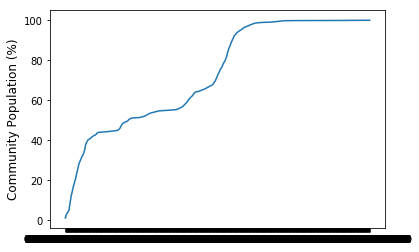

In [8]:
# graphing one of the tables
f, cr_ax = plt.subplots(1)

#print(table)
comm_table = data_path + "processed/resample/" + 'community_23.csv'
    #community = table.split('.')[0]
    #number = community.split('_')[1]
    
comm_table_data = pd.read_csv(comm_table)
plt.plot(comm_table_data['DIST_RS'], comm_table_data['Comm_Per'])
plt.ylabel('Community Population (%)', fontname="Roboto", fontsize=12)
#plt.xlabel('Distance from Community High Point (km)', fontname="Roboto", fontsize=12)
#plt.title('Single Centred Communities Pop v Distance', fontname="Roboto", fontsize=13)

plt.show()
    #f.savefig("../../figures/" + community + "_pop_v_distance.png", bbox_inches='tight')
    #plt.close(f)


In [76]:
plt.close(f)

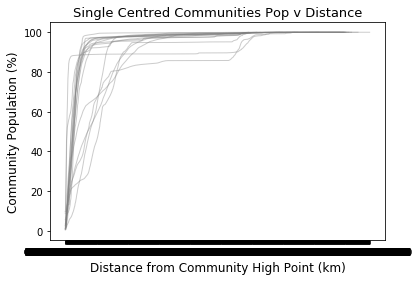

In [77]:
# Old code
'''f, cr_ax = plt.subplots(1)

for table in comm_s_tables:
    #print(table)
    comm_table = data_path + "processed/resample/" + table
    #community = table.split('.')[0]
    #number = community.split('_')[1]
    
    comm_table_data = pd.read_csv(comm_table)
    #plt.style.use('seaborn')
    plt.plot(comm_table_data['DIST_RS'], comm_table_data['Comm_Per'],color='grey', linewidth=1, alpha=0.4)
    #plt.rcParams["font.family"] = "Avenir"
    plt.ylabel('Community Population (%)', fontname="Roboto", fontsize=12)
    plt.xlabel('Distance from Community High Point (km)', fontname="Roboto", fontsize=12)
    plt.title('Single Centred Communities Pop v Distance', fontname="Roboto", fontsize=13)
    
    for tick in cr_ax.get_xticklabels():
        tick.set_fontname("Roboto")
    for tick in cr_ax.get_yticklabels():
        tick.set_fontname("Roboto")
    
    #cr_ax.legend(loc='lower right')

plt.show()
    #f.savefig("../../figures/" + community + "_pop_v_distance.png", bbox_inches='tight')
    #plt.close(f)''''''
    

In [78]:
plt.close(f)

In [4]:
single_comms_mean = pd.DataFrame()

In [5]:
single_comms_mean.head()

""


In [6]:
for table in comm_s_tables:
    comm_table = data_path + "processed/resample/" + table[:-4]+ '_bf.csv'
    comm_table_data = pd.read_csv(comm_table)
    column_nm = table[:-4]
    single_comms_mean[column_nm] = comm_table_data['Comm_Per']

In [7]:
single_comms_mean.head()

,community_1,community_11,community_14,community_15,community_16,community_21,community_24,community_26,community_27,community_28,community_3,community_34,community_4,community_6,community_7,community_8,community_9
0,1.181045,2.923344,3.130790,1.506493,3.693014,8.756814,5.672279,0.524715,2.371602,9.842701,1.065022,2.713250,1.434343,0.668597,0.789501,2.009719,1.135073
1,1.388948,3.776751,3.318811,1.610752,3.838830,10.726589,5.722597,0.567254,5.168739,16.277542,1.100164,4.283371,1.679895,0.674026,1.132312,2.266246,1.539187
2,1.388948,3.776751,3.318811,1.610752,4.910679,16.655712,7.339636,0.567254,5.168739,16.277542,1.492440,4.283371,1.679895,0.674026,1.132312,2.266246,1.981777
3,2.077484,4.828927,6.931348,2.518109,5.575307,23.305387,8.513662,0.943990,5.168739,16.277542,1.716226,7.516204,2.457832,1.284473,1.958676,3.499975,2.611776
4,2.786070,5.502798,9.232306,3.540176,6.585002,31.814384,9.114638,1.395121,5.168739,23.650265,2.385720,9.027778,4.786695,1.873933,2.585133,4.251691,3.313561


In [13]:
single_comms_mean.to_csv(data_path + "processed/resample/single_comms.csv")

In [14]:
print(data_path)

../../data/working_files/comm_distpop/


In [8]:
single_comms_mean['average'] = single_comms_mean.mean(axis=1)
single_comms_mean.head()

,community_1,community_11,community_14,community_15,community_16,community_21,community_24,community_26,community_27,community_28,community_3,community_34,community_4,community_6,community_7,community_8,community_9,average
0,1.181045,2.923344,3.130790,1.506493,3.693014,8.756814,5.672279,0.524715,2.371602,9.842701,1.065022,2.713250,1.434343,0.668597,0.789501,2.009719,1.135073,2.906959
1,1.388948,3.776751,3.318811,1.610752,3.838830,10.726589,5.722597,0.567254,5.168739,16.277542,1.100164,4.283371,1.679895,0.674026,1.132312,2.266246,1.539187,3.827765
2,1.388948,3.776751,3.318811,1.610752,4.910679,16.655712,7.339636,0.567254,5.168739,16.277542,1.492440,4.283371,1.679895,0.674026,1.132312,2.266246,1.981777,4.383817
3,2.077484,4.828927,6.931348,2.518109,5.575307,23.305387,8.513662,0.943990,5.168739,16.277542,1.716226,7.516204,2.457832,1.284473,1.958676,3.499975,2.611776,5.716803
4,2.786070,5.502798,9.232306,3.540176,6.585002,31.814384,9.114638,1.395121,5.168739,23.650265,2.385720,9.027778,4.786695,1.873933,2.585133,4.251691,3.313561,7.471412


C:\Users\jowilkin\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family [u'Roboto'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


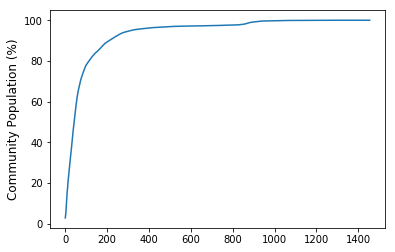

In [9]:
f, cr_ax = plt.subplots(1)

plt.plot(single_comms_mean['average'])
plt.ylabel('Community Population (%)', fontname="Roboto", fontsize=12)
#plt.xlabel('Distance from Community High Point (km)', fontname="Roboto", fontsize=12)
#plt.title('Single Centred Communities Pop v Distance', fontname="Roboto", fontsize=13)

plt.show()
    #f.savefig("../../figures/" + community + "_pop_v_distance.png", bbox_inches='tight')


In [10]:
plt.close(f)

In [11]:
single_comms_mean['std'] = single_comms_mean.std(axis=1)

In [12]:
for row in range(len(single_comms_mean['average'])):
    #print row
    single_comms_mean.loc[row,'std_plus'] = single_comms_mean.loc[row,'average'] + single_comms_mean.loc[row,'std']
    single_comms_mean.loc[row,'std_minus'] = single_comms_mean.loc[row,'average'] - single_comms_mean.loc[row,'std']

In [13]:
single_comms_mean.head()

,community_1,community_11,community_14,community_15,community_16,community_21,community_24,community_26,community_27,community_28,...,community_34,community_4,community_6,community_7,community_8,community_9,average,std,std_plus,std_minus
0,1.181045,2.923344,3.130790,1.506493,3.693014,8.756814,5.672279,0.524715,2.371602,9.842701,...,2.713250,1.434343,0.668597,0.789501,2.009719,1.135073,2.906959,2.663254,5.570213,0.243704
1,1.388948,3.776751,3.318811,1.610752,3.838830,10.726589,5.722597,0.567254,5.168739,16.277542,...,4.283371,1.679895,0.674026,1.132312,2.266246,1.539187,3.827765,3.962198,7.789963,-0.134432
2,1.388948,3.776751,3.318811,1.610752,4.910679,16.655712,7.339636,0.567254,5.168739,16.277542,...,4.283371,1.679895,0.674026,1.132312,2.266246,1.981777,4.383817,4.756969,9.140786,-0.373152
3,2.077484,4.828927,6.931348,2.518109,5.575307,23.305387,8.513662,0.943990,5.168739,16.277542,...,7.516204,2.457832,1.284473,1.958676,3.499975,2.611776,5.716803,5.717557,11.434360,-0.000753
4,2.786070,5.502798,9.232306,3.540176,6.585002,31.814384,9.114638,1.395121,5.168739,23.650265,...,9.027778,4.786695,1.873933,2.585133,4.251691,3.313561,7.471412,7.906752,15.378165,-0.435340


In [14]:
single_comms_mean['distance'] = range(0,len(single_comms_mean['average']) )

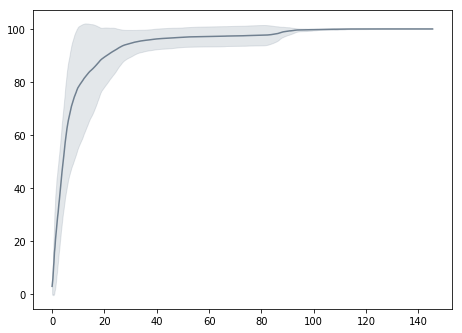

In [15]:
#f, cr_ax = plt.subplots(1)

#plt.plot(single_comms_mean['average'])
#plt.plot(single_comms_mean['std_plus'])
#plt.plot(single_comms_mean['std_minus'])
#plt.ylabel('Community Population (%)', fontname="Roboto", fontsize=12)
#plt.xlabel('Distance from Community High Point (km)', fontname="Roboto", fontsize=12)
#plt.title('Single Centred Communities Pop v Distance', fontname="Roboto", fontsize=13)

#plt.show()
#f.savefig("../../figures/" + "_pop_v_distance_std.png", bbox_inches='tight')
    #plt.close(f)

ave = single_comms_mean['average']
std = single_comms_mean['std']
#stp = dual_comms_mean['std_plus']
#std = dual_comms_mean['std_minus']
x = single_comms_mean['distance']

fig, ax = plt.subplots(figsize=(7.5,5.5))
#plt.style.use('')
ax.plot(x/10, ave,color='slategrey')
ax.fill_between(x/10, ave - std, ave + std, alpha=0.2,color='lightslategrey')

#plt.ylabel('Community Population (%)', fontname="Roboto", fontsize=12)
#plt.xlabel('Distance from Community High Point (km)', fontname="Roboto", fontsize=12)

In [17]:
f.savefig(data_path + "single.png", bbox_inches='tight')
plt.close(f)

In [18]:
comm_du_tables = ['community_10.csv', 'community_12.csv', 'community_13.csv', 'community_18.csv','community_23.csv', 'community_25.csv', 'community_20.csv', 'community_29.csv',]
print(len(comm_du_tables))

8


In [19]:
dual_comms_mean = pd.DataFrame()

In [20]:
for table in comm_du_tables:
    #print(table)
    comm_table = data_path + "processed/resample/" + table[:-4]+ '_bf.csv'
    comm_table_data = pd.read_csv(comm_table)
    column_nm = table[:-4]
    dual_comms_mean[column_nm] = comm_table_data['Comm_Per']

In [21]:
dual_comms_mean['average'] = dual_comms_mean.mean(axis=1)
dual_comms_mean.head()

,community_10,community_12,community_13,community_18,community_23,community_25,community_20,community_29,average
0,0.974650,1.092480,0.551912,1.315651,1.197894,1.913937,1.543074,0.711692,1.162661
1,1.321786,2.119682,0.571361,1.481287,1.884597,1.947602,2.010886,0.727019,1.508028
2,1.321786,2.119682,0.813525,1.481287,1.884597,2.797120,2.010886,0.727019,1.644488
3,1.622704,2.119682,1.133013,2.190021,2.773953,3.231658,2.813717,1.536055,2.177600
4,2.500725,3.154014,1.502071,2.778048,2.962916,3.427269,4.998157,1.886027,2.901153


In [22]:
dual_comms_mean['std'] = dual_comms_mean.std(axis=1)

In [23]:
for row in range(len(dual_comms_mean['average'])):
    #print row
    dual_comms_mean.loc[row,'std_plus'] = dual_comms_mean.loc[row,'average'] + dual_comms_mean.loc[row,'std']
    dual_comms_mean.loc[row,'std_minus'] = dual_comms_mean.loc[row,'average'] - dual_comms_mean.loc[row,'std']

In [24]:
dual_comms_mean['distance'] = range(0,len(dual_comms_mean['average']) )

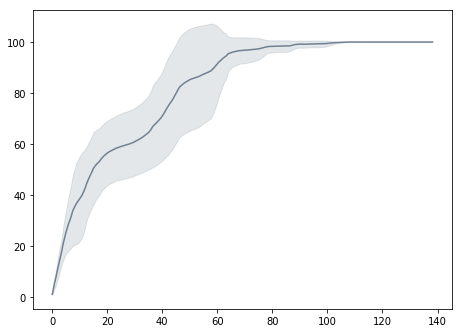

In [25]:
ave = dual_comms_mean['average']
std = dual_comms_mean['std']
#stp = dual_comms_mean['std_plus']
#std = dual_comms_mean['std_minus']
x = dual_comms_mean['distance']

fig, ax = plt.subplots(figsize=(7.5,5.5))
#plt.style.use('')
ax.plot(x/10, ave,color='slategrey')
ax.fill_between(x/10, ave - std, ave + std, alpha=0.2,color='lightslategrey')

#plt.ylabel('Community Population (%)', fontname="Roboto", fontsize=12)
#plt.xlabel('Distance from Community High Point (km)', fontname="Roboto", fontsize=12)

In [26]:
plt.close(f)

In [27]:
plt.close()

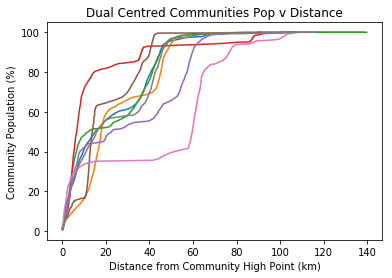

In [22]:
f, cr_ax = plt.subplots(1)

for table in comm_du_tables:
    #print(table)
    comm_table = data_path + "processed/" + table
    #community = table.split('.')[0]
    #number = community.split('_')[1]
    
    comm_table_data = gpd.read_file(comm_table)
    plt.plot(comm_table_data['NEAR_DIST_'], comm_table_data['Comm_Per'])
    plt.ylabel('Community Population (%)')
    plt.xlabel('Distance from Community High Point (km)')
    plt.title('Dual Centred Communities Pop v Distance')

plt.show()
    #f.savefig("../../figures/" + community + "_pop_v_distance.png", bbox_inches='tight')
    #plt.close(f)
    

In [14]:
plt.close(f)

In [28]:
comm_z_tables = ['community_0.shp', 'community_2.shp','community_5.shp','community_17.shp', 'community_19.shp']
print(len(comm_z_tables))

5


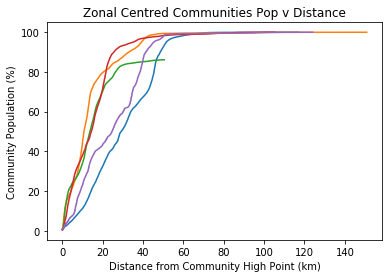

In [29]:
f, cr_ax = plt.subplots(1)

for table in comm_z_tables:
    #print(table)
    comm_table = data_path + "processed/" + table
    #community = table.split('.')[0]
    #number = community.split('_')[1]
    
    comm_table_data = gpd.read_file(comm_table)
    plt.plot(comm_table_data['NEAR_DIST_'], comm_table_data['Comm_Per'])
    plt.ylabel('Community Population (%)')
    plt.xlabel('Distance from Community High Point (km)')
    plt.title('Zonal Centred Communities Pop v Distance')

plt.show()
    #f.savefig("../../figures/" + community + "_pop_v_distance.png", bbox_inches='tight')
    #plt.close(f)
    

In [30]:
plt.close(f)

In [31]:
zonal_comms_mean = pd.DataFrame()

In [33]:
for table in comm_z_tables:
    #print(table)
    comm_table = data_path + "processed/resample/" + table[:-4]+ '_bf.csv'
    comm_table_data = pd.read_csv(comm_table)
    column_nm = table[:-4]
    zonal_comms_mean[column_nm] = comm_table_data['Comm_Per']

In [34]:
zonal_comms_mean['average'] = zonal_comms_mean.mean(axis=1)
zonal_comms_mean.head()

,community_0,community_2,community_5,community_17,community_19,average
0,0.406000,0.944854,0.815204,0.448697,0.486697,0.620290
1,0.787741,1.400700,1.352160,0.476851,1.016691,1.006828
2,0.787741,1.400700,1.352160,0.534009,1.016691,1.018260
3,0.787741,2.207060,1.352160,0.732788,1.016691,1.219288
4,1.172131,3.151645,2.296876,0.994071,1.016691,1.726283


In [35]:
zonal_comms_mean['std'] = zonal_comms_mean.std(axis=1)

In [36]:
for row in range(len(zonal_comms_mean['average'])):
    #print row
    zonal_comms_mean.loc[row,'std_plus'] = zonal_comms_mean.loc[row,'average'] + zonal_comms_mean.loc[row,'std']
    zonal_comms_mean.loc[row,'std_minus'] = zonal_comms_mean.loc[row,'average'] - zonal_comms_mean.loc[row,'std']

In [39]:
zonal_comms_mean['distance'] = range(0,len(zonal_comms_mean['average']) )

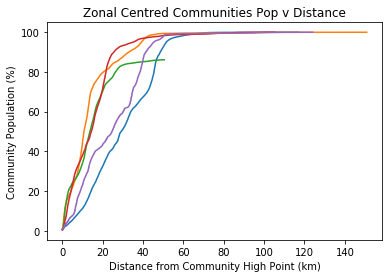

In [40]:
f, cr_ax = plt.subplots(1)

for table in comm_z_tables:
    #print(table)
    comm_table = data_path + "processed/" + table
    #community = table.split('.')[0]
    #number = community.split('_')[1]
    
    comm_table_data = gpd.read_file(comm_table)
    plt.plot(comm_table_data['NEAR_DIST_'], comm_table_data['Comm_Per'])
    plt.ylabel('Community Population (%)')
    plt.xlabel('Distance from Community High Point (km)')
    plt.title('Zonal Centred Communities Pop v Distance')

plt.show()

In [41]:
plt.close()

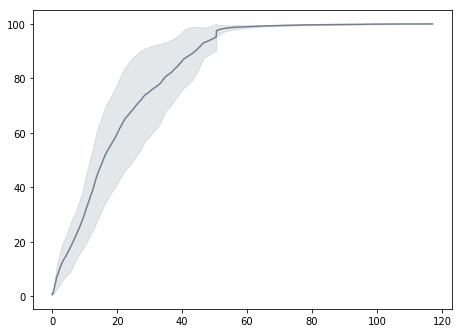

In [42]:
ave = zonal_comms_mean['average']
std = zonal_comms_mean['std']
#stp = dual_comms_mean['std_plus']
#std = dual_comms_mean['std_minus']
x = zonal_comms_mean['distance']

fig, ax = plt.subplots(figsize=(7.5,5.5))
#plt.style.use('')
ax.plot(x/10, ave,color='slategrey')
ax.fill_between(x/10, ave - std, ave + std, alpha=0.2,color='lightslategrey')

#plt.ylabel('Community Population (%)', fontname="Roboto", fontsize=12)
#plt.xlabel('Distance from Community High Point (km)', fontname="Roboto", fontsize=12)

In [43]:
plt.close()